In [149]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import random
import math
import time

In [15]:
X,y = make_blobs(n_samples=10, centers=2, n_features=3, random_state=0)

In [16]:
y

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [231]:
x = list()
y = list()
z = list()

random.seed(21)
for i in range(0,50):
    x.append(random.randint(0,1))
    
random.seed(13)
for i in range(0,50):
    y.append(random.randint(0,1))

random.seed(9)
for i in range(0,50):
    z.append(random.randint(0,1))

In [232]:
print(x)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]


In [233]:
print(y)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [234]:
print(z)

[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [235]:
data = {
    'x':x,
    'y':y,
    'z':z
}

In [236]:
df = pd.DataFrame(data)

In [237]:
df

,x,y,z
0,0,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,0
5,0,0,0
6,1,0,1
7,0,0,1
8,0,0,0
9,0,0,1


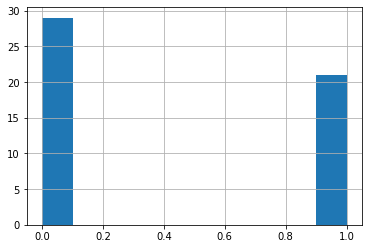

In [238]:
df['x'].hist()

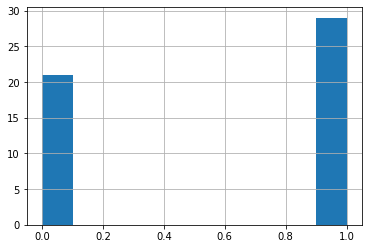

In [239]:
df['y'].hist()

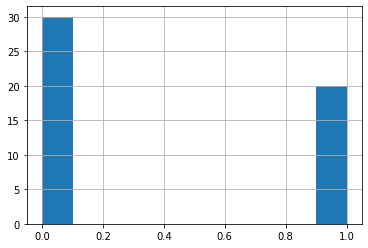

In [240]:
df['z'].hist()

In [241]:
def calculate_mi(df, left, right):
    df['probability'] = 1.0 / len(df.index)
    left_variables = left
    right_variables = right
    all_variables = [left,right]
    
    marginal_probability_all_variables = df.groupby(all_variables)
    marginal_probability_left_variables = df.groupby(left_variables)
    marginal_probability_right_variables = df.groupby(right_variables)
    all_variable_keys = dict(list(marginal_probability_all_variables))
    lhs_variable_keys = dict(list(marginal_probability_left_variables))
    rhs_variable_keys = dict(list(marginal_probability_right_variables))
    #print(all_variable_keys)
    #print(all_variable_keys.keys())
    
    mi = 0
    for key in all_variable_keys:
        lhs_key = (key[0])
        rhs_key = (key[-1])

        p_joint = marginal_probability_all_variables.get_group(key)['probability'].sum()
        cooc_count =  marginal_probability_all_variables.get_group(key)['probability'].count()
        p_left = marginal_probability_left_variables.get_group(lhs_key)['probability'].sum()
        left_count = marginal_probability_left_variables.get_group(lhs_key)['probability'].count()
        p_right = marginal_probability_right_variables.get_group(rhs_key)['probability'].sum()
        right_count = marginal_probability_right_variables.get_group(rhs_key)['probability'].count()


        if p_right > 0 and p_left > 0  and p_joint > 0:
            pmi = p_joint * np.log2(p_joint / (p_left * p_right))
            '''
            print('key:{},pmi={}'.format(key,pmi))
            print('cooc count: {}'.format(cooc_count))
            print('left var count: {}'.format(left_count))
            print('right var count: {}'.format(right_count))
            
            '''
            
            
            
           
            mi += pmi

    return mi

In [242]:
left = 'x'
right = 'z'
calculate_mi_x = calculate_mi(df, left, right)

In [243]:
calculate_mi_x

0.0007909926284738085

In [244]:
left = 'y'
right = 'z'
calculate_mi_y = calculate_mi(df, left, right)

In [245]:
calculate_mi_y

0.03336661300583613

In [246]:
def compute_conflict_def2(df,left,right):
    
    #print(left)
    #print(right)
    
    all_variables = [left,right]
    #all_variables = [right,left]
    all_variables_group = df.groupby(all_variables)
    all_variable_keys_group = dict(list(all_variables_group))
    
    all_variable_keys = list(all_variable_keys_group.keys())
    #print(all_variable_keys)
    #return
    '''
    # here keys in all_variable_keys will hold the distinct value pair of the attribute with class label
    for k in all_variable_keys.keys():
        print(k)
    '''
    # contains cooccurrence count for left variable value with z value,
    # such that this is the smallest of the count for left variable occurring with z value
    cache = {} 
    
    # contains occurrence of value of left side variable in the key for (left,right), 
    # for noconflict it will have 1,
    # for conflict it will have 2 (no. of class)
    
    val_occurrence = {} 
    
    
    for key in all_variable_keys:

        cooc_count =  all_variables_group.get_group(key)[left].count()
        #print('key :{}, cooc count: {}'.format(key[0],cooc_count))
        
        if key[0] not in cache:
            val_occurrence[key[0]] = 1
            cache[key[0]] = cooc_count
            
        else:
            val_occurrence[key[0]] +=1
            if cooc_count < cache[key[0]]:
                cache[key[0]] = cooc_count 
            elif cooc_count == cache[key[0]]:
                cache[key[0]] = 0
            
                
                

    #print('cache is: ')
    #print(cache)
          
    #print('val_occurrence')
    #print(val_occurrence)
    
       
    
    
    conflict_vals = [k for k,v in val_occurrence.items() if v > 1]
    #print('conflict vals:{}'.format(conflict_vals))
    #print('no. of conflict vals: {}'.format(len(conflict_vals)))
    
    conflicts = sum([v for k,v in cache.items() if k in conflict_vals])
    # print('conflict is : {}'.format(conflicts))
    # print(sum(vals))
    
    return (conflicts,len(conflict_vals))

In [247]:
conf_new_x = compute_conflict_def2(df,'x','z')
conf_new_y = compute_conflict_def2(df,'y','z')

In [248]:
print('conflict_x : {}, conflict_y: {}'.format(conf_new_x,conf_new_y))

conflict_x : (20, 2), conflict_y: (19, 2)


In [249]:
print('mi_x =  {:.4f}, mi_y = {:.4f}'.format(calculate_mi_x,calculate_mi_y))

mi_x =  0.0008, mi_y = 0.0334


This is a test for markdown cell


Euler's identity: $e^{i \pi} + 1 = 0 $